ML: is a set of tools and techniques which allow to find patterns in data

- We can do Deep learning with Convolutional Neural Network (CNN)
- CNN is a DL algorithm that work better for image classification due to the ability to learn automatically features from images in a hierachical fashion (i.e each layer builds upon what was learned by the previous layer)
- Image classification is a fundamental taks in computer vision
- Many practical applications of image classification are:
    1. Object Recognition: identifying objects within images, such as cars, animals, or household items
    2. Medical Imaging: diagnosing diseases from medical images like X-rays or MRIs
    3. Quality Control: inspecting products for defects on manufacturing lines
    4. Autonomous Vehicles: identifying pedestrians, traffic signs, and other vehichles in self-driving cars
    5. Security and Surveillance: detecting anomalies or unauthorised objects in security footage



### Deep learning workflow
**step1: Outline the problem**
    - example: image classification so the aim is to put an image into one of a few categories.
    - We can use CIFAR-10 dataset and have 10 categories: airplane, automobile, bird,cat, deer, dog, frog, horse, ship, truck
    
**step2: Identify inputs and outputs**
    - example: the data is images and the inputs could be the individual pixels of the images
    - the output will be one for each potential class
**step3: Prepare data **
    - neural networks only deal with numerical data, hence non-numerical data (e.g., images) will need to be converted to numerical data
    - normalize the imae pixel values to be between 0 and 1
    - one-hot encode the training image labels
    - divide the data into training, validation and test subsets
    
**step4: Choose a pre-trained model or build a new architecture from scratch**
    - design the model from scratch, we need to think about how many input neurons to use, how many hidden layers and how many outputs, and what types of layers to use.
    
**step5: Choose a loss function and optimizer and compile the model**
    - compile the model is how to set up the rules and strategies for how the network is going to learn
    - loss function: tells the training algorithm how far away the predicted value was from the true value
    - optimizer: is used for taking the output of the loss function and then applying some changes to the weights within the network. It is through this process that 'learning' (adjustment of the weights) is achieved
    
**step6: Train the model**
    - training the model for a given number of iterations (epochs) through the training dataset or until the loss function gives a value under a certain threshold
    
**step7: Perform a prediction/classification**
    - after training the network, we use it to perform prediction on a special hold-out set
    - make sure the data used to test are prepared the same way as the training data
    
**step8: Measure performance**
    - using the test dataset to find our well the model performs.
    
**step9: Tune Hyperparameters**
    - when using libraries like TensorFlow or Keras, the process also is selecting the best values for various hyperparameters that govern the training process.
    - Hyperparameters: are all the parameters set by the person configuring the model as opposed to those learned by the algorithm itself. Includes: learning rate, number of layers in the network, number of neurons per layer, etc.
    - Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters that will optimise the model's performance.
    
**step10: Share the model**
    - if our model is from scratch, we can allow others to use it as a pre-trained network and for them to reproduce our result
    - we must save the model in order to share it

In [1]:
# load needed packages
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
# function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one-hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into train and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=42
    )

    return train_images, val_images, train_labels, val_labels


In [21]:
# load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#### step 3, prepare the data
# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)

In [4]:
print('Train: Images=%s, Labels=%s' % (train_images.shape, train_labels.shape))
print('Validate: Images=%s, Labels=%s' % (val_images.shape, val_labels.shape))
print('Test: Images=%s, Labels=%s' % (test_images.shape, test_labels.shape))

Train: Images=(40000, 32, 32, 3), Labels=(40000, 10)
Validate: Images=(10000, 32, 32, 3), Labels=(10000, 10)
Test: Images=(10000, 32, 32, 3), Labels=(10000, 1)


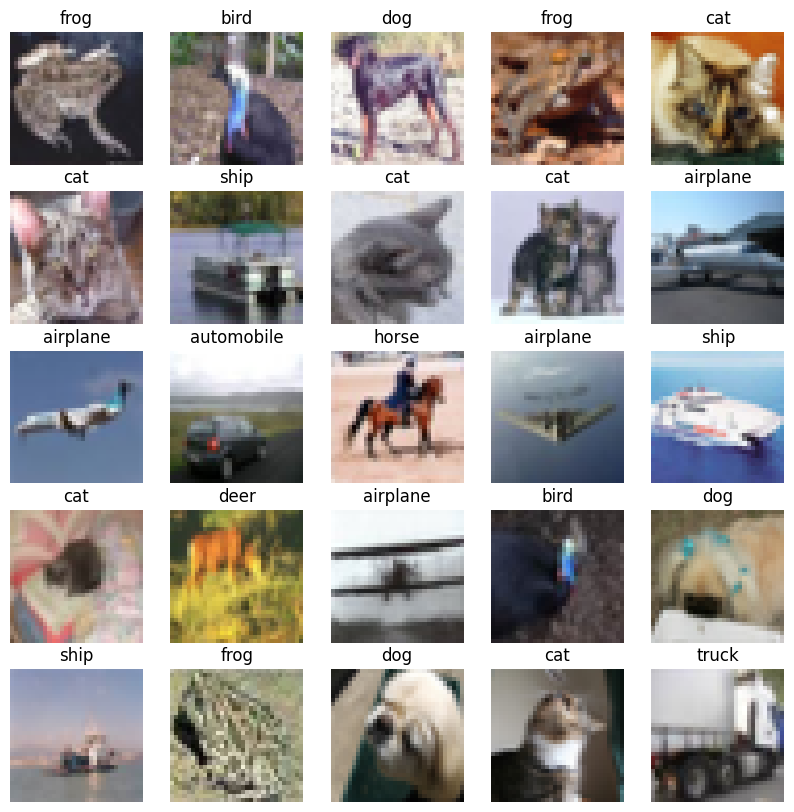

In [5]:
# visualize a subset of the CIFAR-10 dataset
# set up plot region
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))

# add images to plot
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(class_names[train_labels[i,].argmax()])

# view plot
plt.show()

In [6]:
train_images.shape[1:]

(32, 32, 3)

- epoch: describes the number of full passes over all training data
    - there are 1250 batches (steps) to complete each epoch
    - calculated from the number of images as input/batch size (40000/32)
- loss: the model try to minimise this value, an error between the true label of an image and the model prediction.
    - minimising this distance is where *learning* occurs to adjust weights and bias which reduce loss
- val_loss: a value calculated against the validation data and is a measure of the model's performance against unseen data
    - both values are a summation of errors made during each epoch
- accuracy and val_accuracy values are a percentage and are only relevant to classification problems
    - val_accuracy score: used to communicate a model's effectiveness on unseen data

- Training the model for more epochs (longer time) and using a deeper model (more layers) helps it learn better and give more accurate predictions
- The model learned well and its performance doesn't change much with more training, we say it has *converged*
- **Convergence** refers to the point where the model has reached an optimal or near-optimal state in terms of learning from the training data
- getting a different answer if you run the model again. Although the neural network itself is deterministic (ie without randomness), vairous factors in the training process, system setup, and hardware configurations can lead to small variations in the output
- Improving the accuracy of the model can be done by adding or removing layers and fine-tuning the hyperparameters

#### Data preprocessing
Various tasks to enhance the quality and consistency of the data:
    
- **Resizing**: resize images to a consistent resolution to ensure uniformity and reduce computational load
- **Augmentation**: apply random transformations (e.g. rotations, shifts, flips) to create new variations of the same image. Improve the robustness and generalisation of the model by exposing to more diverse data
- **Normalization**: scale pixel value to a common range, often between 0 and 1 or -1 and 1. It helps the model to converge faster during training
- **Label encoding**: approach used to represent categorical data with numerical labels
- **Data splitting**: split the data set into seprate parts to have one for training, for evaluating during training, and one reserved for the final evaluation of the model's performance


**Pixels**
- images in a computer are stored as rectangular arrays of hundreds, thousands or millions of discrete 'picture elements' known as pixels
- Each pixel can be thought as a single square point of coloured light
- in Python, an image can be represented as a 2- or 3-dimensional array
- **Array** is used to store multiple values or elements of the same datatype in a single variable
- In the context of images, arrays have dimensions for height, width, and colour channels (if applicable) and each element corresponds to a pixel value in the image

Image augmentation
- several ways used to augment data to increase the diversity of the training data and improve model robustness
- Geometric transformations: rotation, scaling, zooming, cropping
- Flipping or mirroring: some classes, like horse, have a different shape when facing left or right and we want our model to recognize both
- Colour properties: brightness, contrast, or hue. This changes simulate variations in lighting conditions

Normalization
- Image RGB values are between 0 and 255. As input for neural networks, it is better to have small input values.
- The process of converting the RGB values to be between 0 an 1 is called **normalization**
- the image need to be in numpy array before applying normalization


One-hot encoding
- is a technique to represent categorical data as binary vectors, making compatible with ML algorithms
- keras.utils.to_categorical(y, num_classes=None, dtype='float32')
    - y: is an array of class values to be converted into a matrix
    - num_classes: is the total number of classes. If None, this would be inferred as max(y)+1
    - dtype: is the data type expected by the input. Default: 'float32'

Splitting data
- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
- first two parameters are the dataset (X) and the corresponding targets (y)
- test_size: is the fraction of the dataset used for testing
- random_state: controls the shuffling of the dataset, setting this value will reproduce the same results every time it is called
- shuffle: controls whether the order of the rows of the dataset is shuffled before splitting and can be either True or False
- stratify: controls how the split is done

Pre-existing image data
- MNIST dataset: 60,000 training images of handwritten digits (0-9)
- ImageNet: 14 million hand-annotated images indicating objects from more than 20,000 categories.
- MS COCO: more than 200,000 labelled images used for object detection, instance segmentation, keypoint analysis and captioning

In [7]:
type(train_labels), type(test_labels)

(numpy.ndarray, numpy.ndarray)

- But the model returns a vector of probabilities, one for each class.
- Identify the class with the highest probability, then select the most likely class name of the object
- Using numpy.argmax() to find the class with the highest probability in each row

In [8]:
# a new function with a varying dropout
def create_model_dropout_vary(dropout_rate):

  # CNN part 1
  # input layer 32x32 images with three channels (RGB)
  inputs_vary = keras.Input(shape=train_images.shape[1:])

  # CNN part 2
  # convolutional layer with 16 filters, 3x3 kernel size, and ReLU
  x_vary = keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu')(inputs_vary)

  # pooling layer with input window sized 2x2
  x_vary = keras.layers.MaxPooling2D(pool_size=(2,2))(x_vary)

  # second convolutional layer with 32 filters, 3x3 kernel size and ReLU
  x_vary = keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu')(x_vary)

  # second pooling layer with input window size 2x2
  x_vary = keras.layers.MaxPooling2D(pool_size=(2,2))(x_vary)

  # third convolutional layer with 64 filters, 3x3 kernel size and ReLU
  x_vary = keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu')(x_vary)

  # dropout layer randomly drops 50 per cent of the input units
  x_vary = keras.layers.Dropout(rate=dropout_rate)(x_vary)

  # flatten layer to convert 2D feature maps into a 1D vector
  x_vary = keras.layers.Flatten()(x_vary)

  # CNN part 3
  # output layer with 10 units (one of each class) and softmax activation
  outputs_vary = keras.layers.Dense(units=10, activation='softmax')(x_vary)

  # create the model
  model_vary = keras.Model(inputs=inputs_vary,
                              outputs=outputs_vary,
                              name='cifar_model_dropout_vary')

  return model_vary



In [9]:
train_labels.shape, val_labels.shape

((40000, 10), (10000, 10))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - categorical_accuracy: 0.3245 - loss: 1.8455 - val_categorical_accuracy: 0.4803 - val_loss: 1.4470
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - categorical_accuracy: 0.5055 - loss: 1.3804 - val_categorical_accuracy: 0.5694 - val_loss: 1.2381
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - categorical_accuracy: 0.5607 - loss: 1.2312 - val_categorical_accuracy: 0.5927 - val_loss: 1.1538
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - categorical_accuracy: 0.6027 - loss: 1.1187 - val_categorical_accuracy: 0.6212 - val_loss: 1.0860
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - categorical_accuracy: 0.6319 - loss: 1.0425 - val_categorical_accuracy: 0.6293 - val_loss: 1.0525
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - categorical_accuracy: 0.6531 - loss: 0.9874 - val_categorical_accuracy: 0.6599 - val_loss: 0.9847
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - catego

<Axes: xlabel='dropout_rate', ylabel='val_loss_vary'>

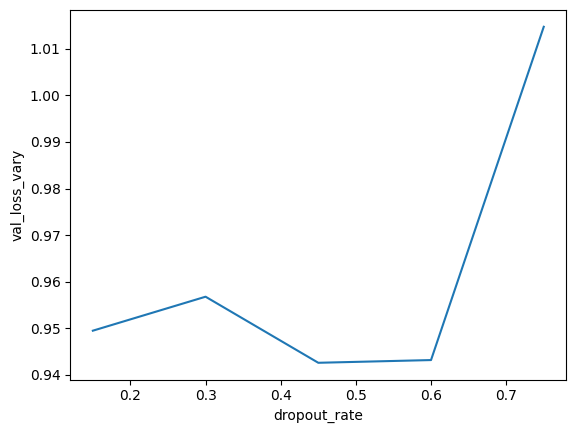

In [10]:

# specify the dropout rates range
dropout_rates = [0.15, 0.3, 0.45, 0.6, 0.75]

# create empty list to hold losses
val_losses_vary = []

# explore varying the dropout rates by for loop
for i in dropout_rates:

  # create the model
  model_vary = create_model_dropout_vary(i)

  # compile the model
  model_vary.compile(optimizer=keras.optimizers.Adam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])

  # fit the model
  model_vary.fit(x=train_images, y=train_labels,
                 batch_size=32, epochs=10,
                 validation_data=(val_images, val_labels))

  # evaluate the model on the test dataset
  val_loss_vary, val_acc_vary = model_vary.evaluate(val_images, val_labels)

  # save the evaluation metrics
  val_losses_vary.append(val_loss_vary)

# convert rates and metrics to dataframe for plotting
loss_df = pd.DataFrame({'dropout_rate':dropout_rates, 'val_loss_vary':val_losses_vary})

# plot the loss and accuracy from the training process
sns.lineplot(data=loss_df, x='dropout_rate', y='val_loss_vary')

In [11]:
# the best dropout rate is 0.3
# create the model
model_vary_final = create_model_dropout_vary(0.45)

# compile the model
model_vary_final.compile(optimizer=keras.optimizers.Adam(),
                     loss=keras.losses.CategoricalCrossentropy(),
                     metrics=[keras.metrics.CategoricalAccuracy()])

# fit the model
model_vary_final.fit(x=train_images, y=train_labels,
                 batch_size=32, epochs=10,
                 validation_data=(val_images, val_labels))

# save the model
model_vary_final.save('/content/model_vary_final.keras')


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - categorical_accuracy: 0.2901 - loss: 1.9058 - val_categorical_accuracy: 0.4844 - val_loss: 1.4371
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - categorical_accuracy: 0.4927 - loss: 1.3982 - val_categorical_accuracy: 0.5549 - val_loss: 1.2530
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - categorical_accuracy: 0.5456 - loss: 1.2665 - val_categorical_accuracy: 0.5919 - val_loss: 1.1486
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - categorical_accuracy: 0.5756 - loss: 1.1862 - val_categorical_accuracy: 0.6119 - val_loss: 1.0983
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - categorical_accuracy: 0.6057 - loss: 1.1197 - val_categorical_accuracy: 0.6106 - val_loss: 1.0861
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - categorical_accuracy: 0.6176 - loss: 1.0765 - val_categorical_accuracy: 0.6541 - val_loss: 0.9924
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - catego

In [12]:
# performing a prediction/classification
# we need to prepare the test set

# load the CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

# create a list if classnames
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# normalize the RGB values to be between 0 and 1
test_images = test_images / 255.0

# check test image dataset is loaded - images and labels
print('Test: Images=%s, Labels=%s', (test_images.shape, test_labels.shape))

Test: Images=%s, Labels=%s ((10000, 32, 32, 3), (10000, 1))


In [13]:
# predict
# load preferred model
model_best = keras.models.load_model('/content/model_vary_final.keras')
print('We are using', model_best.name)

# use preferred model to predict
predictions = model_best.predict(x=test_images)

# convert probability predictions to table using class names for column names
prediction_df = pd.DataFrame(data=predictions, columns=class_names)

# inspect
print(prediction_df.head())

# convert predictions to class labels
predicted_labels = np.argmax(a=predictions, axis=1)
print('\n',predicted_labels)

We are using cifar_model_dropout_vary
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
   airplane  automobile      bird           cat      deer           dog  \
0  0.003352    0.003300  0.022671  4.912928e-01  0.002618  3.659463e-01   
1  0.091333    0.622163  0.000006  4.714449e-07  0.000007  1.607311e-08   
2  0.163599    0.249469  0.006485  9.164887e-03  0.003121  3.209256e-03   
3  0.467667    0.240514  0.012886  4.456129e-03  0.003927  4.814017e-05   
4  0.000745    0.001290  0.102076  9.816100e-02  0.148074  3.718848e-02   

           frog         horse      ship     truck  
0  5.552413e-02  1.089872e-03  0.041548  0.012659  
1  1.116655e-07  9.046474e-07  0.278069  0.008420  
2  2.013261e-03  4.353461e-03  0.410397  0.148188  
3  3.648393e-04  4.182598e-05  0.268454  0.001642  
4  6.062821e-01  3.001443e-04  0.005167  0.000716  

 [3 1 8 ... 5 1 7]


In [14]:
# measuring the performance of the model

# evaluate the model on the test dataset
test_acc = accuracy_score(y_true=test_labels, y_pred=predicted_labels)
print('Accuracy:', round(test_acc,2))

Accuracy: 0.66


<Axes: xlabel='Predicted Label', ylabel='True Label'>

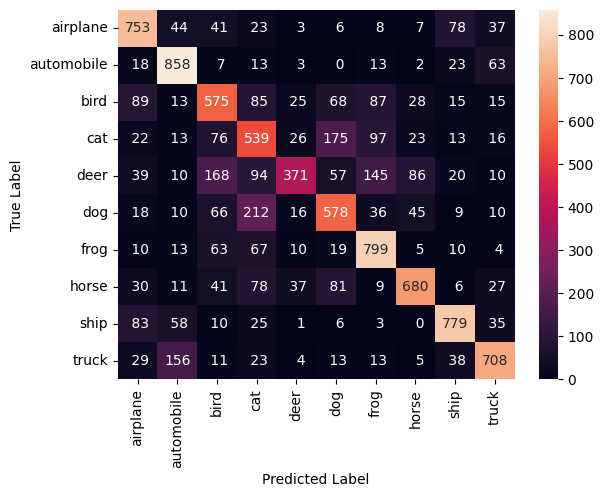

In [15]:
# create a confusion matrix
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=predicted_labels)

# convert confusion matrix to a pandas dataframe
confusion_df = pd.DataFrame(data=conf_matrix, index=class_names, columns=class_names)

# set the names of the x and y axis
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

# use the heatmap function from seabord to visualize the confusion matrix
sns.heatmap(data=confusion_df, annot=True, fmt='3g')

In [16]:
# GridSearch
# define the model
def create_model_intro():

    # CNN Part1
    # input layer of 32x32 images with three channels (RGB)
    inputs_intro = keras.Input(shape=train_images.shape[1:])

    # CNN Part2
    # conv layer with 16 filters, 3x3 kernel size, ReLU activation
    x_intro = keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu')(inputs_intro)
    # pooling layer with input window size 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # second conv layer with 32 filters, 3x3 kernel size, ReLU activation
    x_intro = keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu')(x_intro)
    # second pooling layer with input window sized 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # Flatten layer to convert 2D feature maps into a 1D vector
    x_intro = keras.layers.Flatten()(x_intro)
    # Dense layer with 64 neurons and ReLU activation
    x_intro = keras.layers.Dense(units=64, activation='relu')(x_intro)

    # CNN Part3
    # output layer with 10 units (one for each class) and softmax activation
    outputs_intro = keras.layers.Dense(units=10, activation='softmax')(x_intro)

    # create the model
    model_intro = keras.Model(inputs=inputs_intro,
                              outputs=outputs_intro,
                             name='cifar_model_intro')

    # compile the moel
    model_intro.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.CategoricalCrossentropy(),
                        metrics=[keras.metrics.CategoricalAccuracy()])

    return model_intro

In [18]:
!pip install scikeras

In [ ]:
# define GridSearch parameters

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# instantiate wrapper class for GridSearchCV
model = KerasClassifier(build_fn=create_model_intro, epochs=2, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer=optimizer)

# search over specified parameter values for an estimator
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)

# run fit with all parameters
grid_result = grid.fit(train_images, train_labels)

# summarize results
print('Best: %f using %s', (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Find the optimal activation function

# define the model
def create_model_act(act_func):

    # CNN Part1
    # input layer of 32x32 images with three channels (RGB)
    inputs_act = keras.Input(shape=train_images.shape[1:])

    # CNN Part2
    # conv layer with 16 filters, 3x3 kernel size, activation
    x_act = keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation=act_func)(inputs_act)
    # pooling layer with input window size 2x2
    x_act = keras.layers.MaxPooling2D(pool_size=(2,2))(x_act)
    # second conv layer with 32 filters, 3x3 kernel size, activation
    x_act = keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation=act_func)(x_act)
    # second pooling layer with input window sized 2x2
    x_act = keras.layers.MaxPooling2D(pool_size=(2,2))(x_act)
    # Flatten layer to convert 2D feature maps into a 1D vector
    x_act = keras.layers.Flatten()(x_intro)
    # Dense layer with 64 neurons and activation
    x_act = keras.layers.Dense(units=64, activation=act_func)(x_act)

    # CNN Part3
    # output layer with 10 units (one for each class) and softmax activation
    outputs_act = keras.layers.Dense(units=10, activation='softmax')(x_act)

    # create the model
    model_act = keras.Model(inputs=inputs_act,
                              outputs=outputs_act,
                             name='cifar_model_activation')


    # compile the moel
    model_act.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.CategoricalCrossentropy(),
                        metrics=[keras.metrics.CategoricalAccuracy()])

    return model_act

# create a list of activation functions to try
activations = ['relu', 'sigmoid', 'tanh', 'selu', keras.layers.LeakyReLU()]

# create a dictionary object to store the training history
history_data = {}

# train the model  and store the history
for act in activations:
  model = create_model_act(act)
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=32, epochs=10,
                      validation_data=(val_images, val_labels))

# plot the validation accuracy for each activation function
plt.figure(figsize=(12, 6))

for act, his in history_data.items():
  plt.plot(his.history['val_categorical_accuracy'], label=act)

plt.title('Validation accuracy for different activation functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()